In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

'''
# data preprocessing step
'''
pd.set_option('display.width', 200) # for display width

# 1. read data config(*.csv) file
# [note] *.xlsx must be converted to csv format because of the *.xlsx format does not support
data_config = pd.read_csv('./data/train/data_config.csv', header=0, index_col=0)
print("***** data configurations *****")
print("- config data shape : ", data_config.shape)

# 2. read all data logs (FSR matrix, Seat Sensor Data)
fsr_matrix_data = {}
seat_data = {}

for idx in data_config.index:
    fsr_filepath = './data/train/'+data_config.loc[idx, "fsr_matrix_1d_datafile"]
    seat_filepath = './data/train/'+data_config.loc[idx, "seat_datafile"]
    print(idx, ") read data files : ", fsr_filepath, ",", seat_filepath)

    tmp_fsr_data = pd.read_csv(fsr_filepath, header=0, index_col=False)
    tmp_seat_data = pd.read_excel(seat_filepath, header=0, index_col=False)
    fsr_matrix_data[idx] = tmp_fsr_data.iloc[:,0:161] # slice by the end of column
    seat_data[idx] = tmp_seat_data


***** data configurations *****
- config data shape :  (2, 9)
1 ) read data files :  ./data/train/20210303T160024-1d.csv , ./data/train/data_01.xls
2 ) read data files :  ./data/train/20210303T160024-1d.csv , ./data/train/data_01.xls


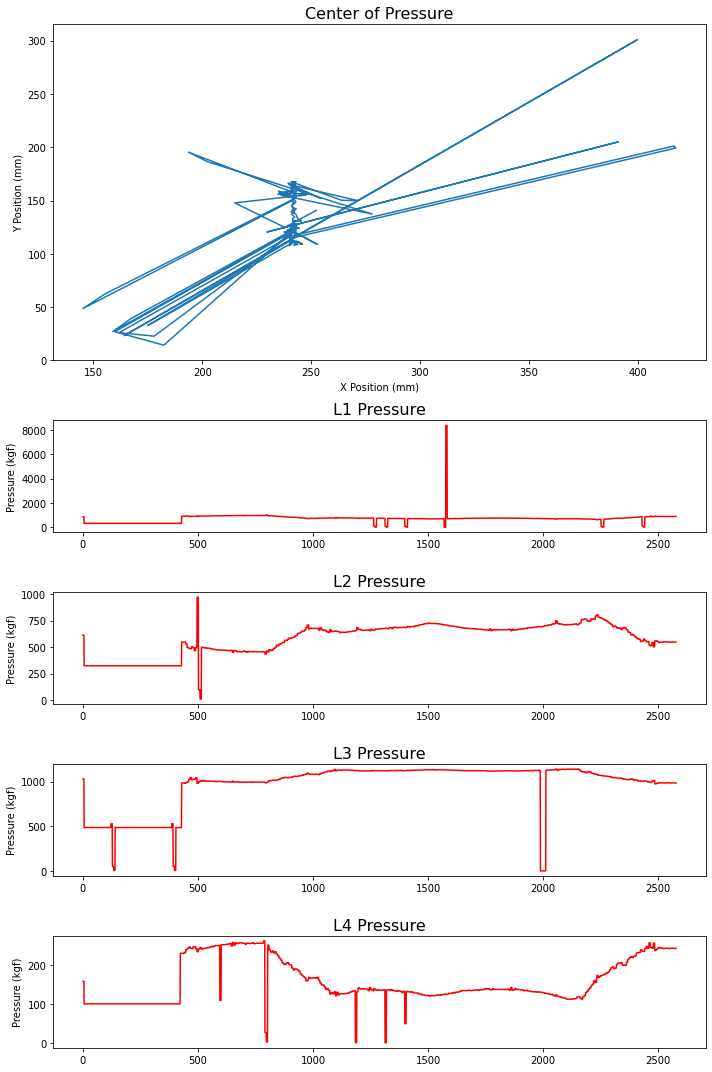

In [252]:

# calculate COP(Center of Pressure)
# extract seat loadcell data
seat_loadcell = seat_data[1].loc[:,["seat_L1", "seat_L2", "seat_L3", "seat_L4"]]
LPos = {"seat_L1":(455,366), "seat_L2":(455,0), "seat_L3":(0,0), "seat_L4":(0,366)}
seat_loadcell["sum"]=seat_loadcell.sum(axis=1)

COPx = (seat_loadcell["seat_L1"]*LPos["seat_L1"][0]+seat_loadcell["seat_L2"]*LPos["seat_L2"][0]+seat_loadcell["seat_L3"]*LPos["seat_L3"][0]+seat_loadcell["seat_L4"]*LPos["seat_L4"][0])/seat_loadcell["sum"]
COPy = (seat_loadcell["seat_L1"]*LPos["seat_L1"][1]+seat_loadcell["seat_L2"]*LPos["seat_L2"][1]+seat_loadcell["seat_L3"]*LPos["seat_L3"][1]+seat_loadcell["seat_L4"]*LPos["seat_L4"][1])/seat_loadcell["sum"]

# plot COP & seat loadcell
fig_cop_loadcell = plt.figure(figsize=(10,15), constrained_layout=True)
gs = gridspec.GridSpec(nrows=5, ncols=1, height_ratios=[3,1,1,1,1], width_ratios=[1])
fig_cop = plt.subplot(gs[0])
fig_cop.plot(COPx, COPy)
fig_cop.set_title('Center of Pressure', fontsize=16)
fig_cop.set_xlabel('X Position (mm)')
fig_cop.set_ylabel('Y Position (mm)')

fig_seat_l1 = plt.subplot(gs[1])
fig_seat_l1.plot(seat_loadcell["seat_L1"], '-', color='red')
fig_seat_l1.set_title('L1 Loadcell Pressure', fontsize=16)
fig_seat_l1.set_ylabel('Pressure (kgf)')

fig_seat_l2 = plt.subplot(gs[2])
fig_seat_l2.plot(seat_loadcell["seat_L2"], '-', color='red')
fig_seat_l2.set_title('L2 Loadcell Pressure', fontsize=16)
fig_seat_l2.set_ylabel('Pressure (kgf)')

fig_seat_l3 = plt.subplot(gs[3])
fig_seat_l3.plot(seat_loadcell["seat_L3"], '-', color='red')
fig_seat_l3.set_title('L3 Loadcell Pressure', fontsize=16)
fig_seat_l3.set_ylabel('Pressure (kgf)')

fig_seat_l4 = plt.subplot(gs[4])
fig_seat_l4.plot(seat_loadcell["seat_L4"], '-', color='red')
fig_seat_l4.set_title('L4 Loadcell Pressure', fontsize=16)
fig_seat_l4.set_ylabel('Pressure (kgf)')

#gs = fig_cop.add_gridspec(nrows=5, ncols=1, left=0.05, right=0.48, wspace=0.05)
# axes1 = fig_cop.add_subplot(gs[:-1, :])
# axes2 = fig_cop.add_subplot(gs[-1, :-1])
# axes3 = fig_cop.add_subplot(gs[-1, -1])


# fig, axes = plt.subplots(ncols=1, nrows=4, constrained_layout=True)

#axes[0].plot(COPx, COPy, 'o')
# axes[0].plot(seat_loadcell["seat_L1"], '-')
# axes[1].plot(seat_loadcell["seat_L2"], '-')
# axes[2].plot(seat_loadcell["seat_L3"], '-')
# axes[3].plot(seat_loadcell["seat_L4"], '-')

# axs[0].set_title('subplot 1')
# axs[0].set_xlabel('distance (m)')
# axs[0].set_ylabel('Damped oscillation')
# fig.suptitle('Center of Pressure Movement', fontsize=16)

# axs[1].plot(seat_loadcell["seat_L1"], seat_loadcell.shape[0], '-')
# axs[1].set_xlabel('time (s)')
# axs[1].set_title('subplot 2')
# axs[1].set_ylabel('Undamped')

# axs[1].plot(seat_loadcell["seat_L2"], seat_loadcell.shape[0], '-')
# axs[1].set_xlabel('time (s)')
# axs[1].set_title('subplot 2')
# axs[1].set_ylabel('Undamped')

# axs[1].plot(seat_loadcell["seat_L3"], seat_loadcell.shape[0], '-')
# axs[1].set_xlabel('time (s)')
# axs[1].set_title('subplot 2')
# axs[1].set_ylabel('Undamped')

# axs[1].plot(seat_loadcell["seat_L4"], seat_loadcell.shape[0], '-')
# axs[1].set_xlabel('time (s)')
# axs[1].set_title('subplot 2')
# axs[1].set_ylabel('Undamped')

fig_cop_loadcell.tight_layout()
plt.show()